In [1]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# In order to see matplotlib plots in a Jupyter Notebook we need to use the following:
%matplotlib inline

In [3]:
N = 4
M = 946

In [4]:
noise = np.random.randn(M * 2, 2)
noise.shape

(1892, 2)

In [5]:
#Не изменится от кол-ва облаков :(
sh = 0.38;
#sh = 0
mn = 1;
cloud0 = mn * (noise + np.array([-sh, sh]))
cloud1 = mn * (noise + np.array([sh, sh]))
cloud2 = mn * (noise + np.array([-sh, -sh]))
cloud3 = mn * (noise + np.array([sh, -sh]))

In [6]:
XY = np.vstack([cloud0, cloud1, cloud2, cloud3])
annotations = np.zeros(M * 2 * N, dtype = int)
for i in range(1, N):
    curr = i * M * 2
    annotations[curr : curr + M * 2] = annotations[curr : curr + M * 2] + [i] * M * 2

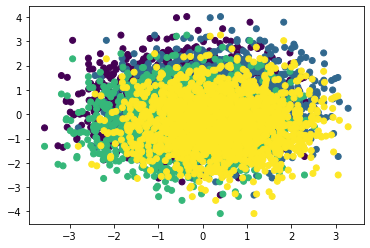

In [7]:
plt.scatter(XY[:,0], XY[:,1], c=annotations)

In [8]:
print('Cloud 0 mean, std, center:')
print(cloud0.mean())
print(cloud0.std())
print(cloud0.mean(axis=0))
print('Cloud 1 mean, std, center:')
print(cloud1.mean())
print(cloud1.std())
print(cloud1.mean(axis=0))
print('Cloud 2 mean, std, center:')
print(cloud2.mean())
print(cloud2.std())
print(cloud2.mean(axis=0))
print('Cloud 3 mean, std, center:')
print(cloud3.mean())
print(cloud3.std())
print(cloud3.mean(axis=0))

Cloud 0 mean, std, center:
0.0074199598032390676
1.0743296399001994
[-0.3828861   0.39772602]
Cloud 1 mean, std, center:
0.3874199598032391
1.0009753109789947
[0.3771139  0.39772602]
Cloud 2 mean, std, center:
-0.37258004019676094
1.0009753109789947
[-0.3828861  -0.36227398]
Cloud 3 mean, std, center:
0.007419959803239068
1.0670140445237346
[ 0.3771139  -0.36227398]


In [9]:
print(XY.shape)
print(annotations.shape)
data, labels = shuffle(XY, annotations)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(data, labels, test_size=0.5)

(7568, 2)
(7568,)


In [10]:
Xtrain.shape, Xtest.shape

((3784, 2), (3784, 2))

In [11]:
len(Ytrain), len(Ytest)

(3784, 3784)

In [12]:
# All the other naive bayess classifiers have the same interface.
# Change the model and see how it performs on the data.
model = GaussianNB()

In [13]:
model.fit(Xtrain, Ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [14]:
pred = model.predict(Xtest)

In [15]:
def evaluate(P, T):
    # P - predictions
    # T - targets
    # accuracy = correct predictions / all predictions
    accuracy = np.mean(P == T)
    print(accuracy*100, '%')
    return accuracy;

In [16]:
evaluate(pred, Ytest)

41.38477801268499 %


0.4138477801268499

In [17]:
# (i, j) elements stands for number of samples of class `i` classified as class `j`
# i - row
# j - column
conf_mat = confusion_matrix(Ytest, pred)
conf_mat

array([[382, 201, 240, 110],
       [230, 386, 121, 241],
       [214,  97, 388, 224],
       [122, 208, 210, 410]])

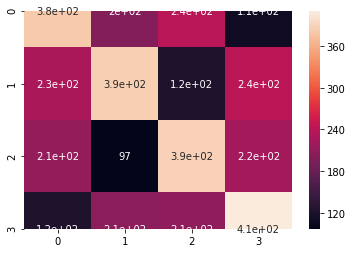

In [18]:
# Visualized confusion matrix
sns.heatmap(conf_mat, annot=True)

In [19]:
from collections import defaultdict

In [20]:
classes, freq = defaultdict(int), defaultdict(int);
z = 2;
#пусть признак - само число в точности до z знака, а класс - это лейбл
#предположим, что код ниже - обучение :D
for point, label in zip(Xtrain, Ytrain):
    classes[label] += 1;
    pointStr = str({round(point[0], z), round(point[1], z)})
    freq[label, pointStr] += 1
    
#for l, p in freq:
#    print(l, p, freq[l, p])
    
for lab, point in freq:
    freq[lab, point] /= classes[lab];
    
trainCount = len(Ytrain);
for cl in classes:
    classes[cl] /= trainCount;

In [21]:
#обернём в ф-ию
def myBayesTrain(trainX, trainCl, z):
    classes, freq = defaultdict(int), defaultdict(int);
    for point, label in zip(trainX, trainCl):
        classes[label] += 1;
        pointStr = str({round(point[0], z), round(point[1], z)})
        freq[label, pointStr] += 1
    
    for lab, point in freq:
        freq[lab, point] /= classes[lab];
    
    trainCount = len(trainCl);
    for cl in classes:
        classes[cl] /= trainCount;
        
    return classes, freq;

In [22]:
#тест классификации на одной точке
yNStr = str({round(Xtest[0, 0], z), round(Xtest[0, 1], z)}); #это будет наш признак
max = 0;
expectClass = -1;
for cl in classes:
    p = classes[cl] * freq[cl, yNStr];
    
    if (p > max):
        max = p;
        expectClass = cl;

print(expectClass)

-1


In [23]:
#классификация
testLen = len(Xtest);
resPredic = np.full(testLen, -1);

for i in range(testLen):
    yNStr = str({round(Xtest[i, 0], z), round(Xtest[i, 1], z)}); #это будет наш признак
    max = 0;
    for cl in classes:
        p = classes[cl] * freq[cl, yNStr];
        
        if (p > max):
            max = p;
            resPredic[i] = cl;

In [24]:
def myBayesClass(testX, classes, freq, z):
    testLen = len(testX);
    resPredic = np.full(testLen, -1);
    
    for i in range(testLen):
        yNStr = str({round(testX[i, 0], z), round(testX[i, 1], z)});
        max = 0;
        for cl in classes:
            p = classes[cl] * freq[cl, yNStr];
            
            if (p > max):
                max = p;
                resPredic[i] = cl;
                
    return resPredic;

In [25]:
evaluate(resPredic, Ytest)

0.8192389006342495 %


0.008192389006342496

In [26]:
conf_mat = confusion_matrix(Ytest, resPredic)
conf_mat

array([[  0,   0,   0,   0,   0],
       [902,   7,   8,  13,   3],
       [948,   6,   7,   8,   9],
       [884,  11,   7,  10,  11],
       [918,   8,   8,   9,   7]])

In [27]:
import time

In [28]:
ZCount = 10;

In [29]:
#замер для Гауссовской, Бернулли и моей вариации алкоритмов
GTimes = np.zeros(ZCount);
BTimes = np.zeros(ZCount);
MyTimes = np.zeros(ZCount);
GConfMat = np.zeros((ZCount, N, N));
BConfMat = np.zeros((ZCount, N, N));
MyConfMat = np.zeros((ZCount, N, N));
GEval = np.zeros(ZCount);
BEval = np.zeros(ZCount);
MyEval = np.zeros(ZCount);

for k in range(ZCount):
    noise = np.random.randn(M * 2, 2)
    
    cloud0 = mn * (noise + np.array([-sh, sh]))
    cloud1 = mn * (noise + np.array([sh, sh]))
    cloud2 = mn * (noise + np.array([-sh, -sh]))
    cloud3 = mn * (noise + np.array([sh, -sh]))
    XY = np.vstack([cloud0, cloud1, cloud2, cloud3])
    annotations = np.zeros(M * 2 * N, dtype = int)
    
    for i in range(1, N):
        curr = i * M * 2
        annotations[curr : curr + M * 2] = annotations[curr : curr + M * 2] + [i] * M * 2
        
    data, labels = shuffle(XY, annotations)
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(data, labels, test_size=0.5)
    
    print('GaussianNB');
    start_time = time.time();
    model = GaussianNB()
    model.fit(Xtrain, Ytrain)
    pred = model.predict(Xtest)
    GTimes[k] = time.time() - start_time;
    GConfMat[k] = confusion_matrix(Ytest, pred);
    print(GConfMat[k])

    GEval[k] = evaluate(pred, Ytest);
    #print(GTimes[i]);
    
    print('myBayesClass');
    start_time = time.time();
    cl, fr = myBayesTrain(Xtrain, Ytrain, z);
    pred = myBayesClass(Xtrain, cl, fr, z);
    MyTimes[k] = time.time() - start_time;
    MyConfMat[k] = confusion_matrix(Ytest, pred);
    print(MyConfMat[k])
    
    MyEval[k] = evaluate(pred, Ytest);
    #print(MyTimes[i]);
    
    print('BernoulliNB');
    start_time = time.time();
    model = BernoulliNB()
    model.fit(Xtrain, Ytrain)
    pred = model.predict(Xtest)
    BTimes[k] = time.time() - start_time;
    BConfMat[k] = confusion_matrix(Ytest, pred);
    print(BConfMat[k])

    BEval[k] = evaluate(pred, Ytest);
    #print(BTimes[i]);
#print(GTimes)
#print(MyTimes)
#print(BTimes)

GaussianNB
[[408. 195. 226. 122.]
 [199. 417. 100. 237.]
 [216. 110. 409. 208.]
 [101. 205. 215. 416.]]
43.604651162790695 %
myBayesClass
[[232. 238. 240. 241.]
 [250. 235. 222. 246.]
 [231. 245. 225. 242.]
 [231. 215. 240. 251.]]
24.92071881606765 %
BernoulliNB
[[396. 209. 228. 118.]
 [189. 436. 100. 228.]
 [203. 117. 416. 207.]
 [ 96. 212. 206. 423.]]
44.15961945031712 %
GaussianNB
[[383. 255. 205. 111.]
 [203. 402. 113. 216.]
 [198. 115. 397. 241.]
 [129. 193. 208. 415.]]
42.204016913319236 %
myBayesClass
[[224. 249. 253. 228.]
 [237. 218. 249. 230.]
 [239. 232. 231. 249.]
 [252. 228. 233. 232.]]
23.916490486257928 %
BernoulliNB
[[390. 249. 213. 102.]
 [202. 412. 120. 200.]
 [202. 116. 408. 225.]
 [131. 207. 225. 382.]]
42.071881606765324 %
GaussianNB
[[415. 211. 192. 117.]
 [213. 406. 104. 201.]
 [221. 122. 409. 206.]
 [131. 256. 197. 383.]]
42.62684989429176 %
myBayesClass
[[249. 248. 211. 227.]
 [208. 254. 231. 231.]
 [228. 238. 248. 244.]
 [247. 242. 235. 243.]]
26.2684989429175

In [30]:
GMeanEval = GEval.mean()
BMeanEval = BEval.mean()
MyMeanEval = MyEval.mean()
print(GMeanEval, 'средняя точность для Гаусса');
print(BMeanEval, 'средняя точность для Бернулли');
print(MyMeanEval, 'моя средняя точность');

0.4182610993657505 средняя точность для Гаусса
0.41926532769556024 средняя точность для Бернулли
0.25208773784355176 моя средняя точность


In [31]:
GTimesM = GTimes.mean()
BTimesM = BTimes.mean()
MyTimesM = MyTimes.mean()
print(GTimesM, 'среднее время для Гаусса');
print(BTimesM, 'среднее время для Бернулли');
print(MyTimesM, 'моё среднее время');

0.0018391132354736329 среднее время для Гаусса
0.0021289825439453126 среднее время для Бернулли
0.10508606433868409 моё среднее время


In [32]:
GDisp = np.std(GTimes)
BDisp = np.std(BTimes)
MyDisp = np.std(MyTimes)
print(GDisp, 'среднее отклонение времени для Гаусса');
print(BDisp, 'среднее отклонение времени для Бернулли');
print(MyDisp, 'моё среднее отклонение времени');

0.0002419635160473312 среднее отклонение времени для Гаусса
6.731094871903322e-05 среднее отклонение времени для Бернулли
0.0009204888107264203 моё среднее отклонение времени


In [33]:
import matplotlib.pyplot as plt

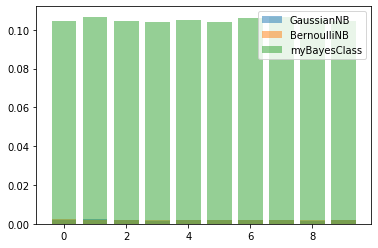

In [34]:
plt.bar(range(ZCount), GTimes, alpha=0.5, label='GaussianNB')
plt.bar(range(ZCount), BTimes, alpha=0.5, label='BernoulliNB')
plt.bar(range(ZCount), MyTimes, alpha=0.5, label='myBayesClass')
plt.legend(loc='upper right')
plt.show()